# GEOS 518 Notebook 1: Reading in Time Series Data
## By: Lejo Flores
## January 24, 2018

In this Jupyter Notebook, I show how to use Pandas to read in a dataset, assign defined labels to the data columns, compute a serial date and plot the historical discharge in the Henry's Fork River from Water Year 2001 to Water Year 2015.

I then extract a time series that goes from the second day of the record to the end (I call it $Q_t$) and another record that goes from the first day to one day prior to the end of the record (I call it $Q_{t-1}$) and save each into a Numpy array. I then plot these two time series against one another looking for the strength of correlation between the time series at a lag of 1-day (the so-called lag 1 autocorrelation).

## 1. Load the libraries needed and import the data

In [1]:
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting

# We will use Pandas - a powerful library built precisey for analyses 
# like this - to read the data in the CSV file into a 'dataframe' the 
# fundamental unit of working with Pandas. In this instance I use the 'read_csv'
# function to create a dataframe, defining column names for myself and telling 
# pandas to skip the header row. I could  have left the 'names' and 'skiprows'
# options and Pandas would have defined the names based on the header row.
df = pd.read_csv('HenrysForkDischarge.csv', names=['Y','M','D','Q'], skiprows=1)

# Now, here's what the first 20 records of dataframe looks like
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Y,M,D,Q
0,2000,10,1,39.361853
1,2000,10,2,39.361853
2,2000,10,3,37.945959
3,2000,10,4,37.945959
4,2000,10,5,37.379601
5,2000,10,6,36.813243
6,2000,10,7,37.096422
7,2000,10,8,36.813243
8,2000,10,9,38.512316
9,2000,10,10,37.662780


## 2. Compute serial dates
Now I'm going to use Pandas 'to_datetime' function to turn my columns of years, months, and days to a serial date. This will be helpful when I plot the data so it will plot unambiguously as a time. 

In [2]:
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d')


# Here's what the first and last 10 records of the modified dataframe looks like
df.iloc[qrows,:]

,Y,M,D,Q,SerDates
0,2000,10,1,39.361853,2000-10-01
1,2000,10,2,39.361853,2000-10-02
2,2000,10,3,37.945959,2000-10-03
3,2000,10,4,37.945959,2000-10-04
4,2000,10,5,37.379601,2000-10-05
5,2000,10,6,36.813243,2000-10-06
6,2000,10,7,37.096422,2000-10-07
7,2000,10,8,36.813243,2000-10-08
8,2000,10,9,38.512316,2000-10-09
9,2000,10,10,37.662780,2000-10-10


## 3. Plot the data

Once you've loaded in the data to a Pandas dataframe, it's always a good practice (particularly the first time) to plot it (or otherwise do some sort of quality control) to ensure that there aren't missing data, no data values that pandas doesn't know how to interpret (-9999 is a very common one that most utilities see as a valid number), or otherwise any weirdness in your data.

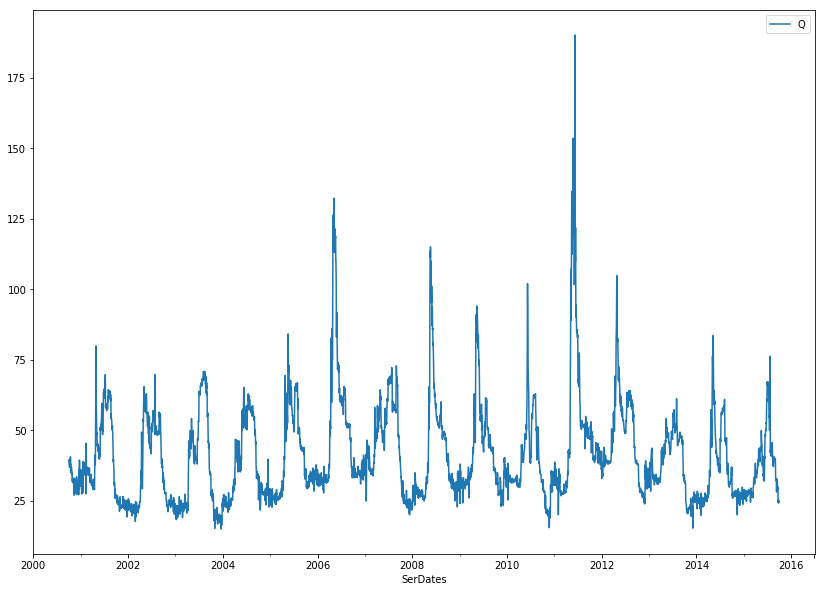

In [3]:
# Use the pandas plotting function, specifying 'SerDates' (the serial datas) on the x axis and 'Q' (discharge)
# on the y axis. I'm also using the 'figsize' option to increase the size of the plotted image
df.plot(x='SerDates', y='Q',figsize=(14,10))

## 4. Get two time series that are lagged by one $\Delta t$, and plot them against each other

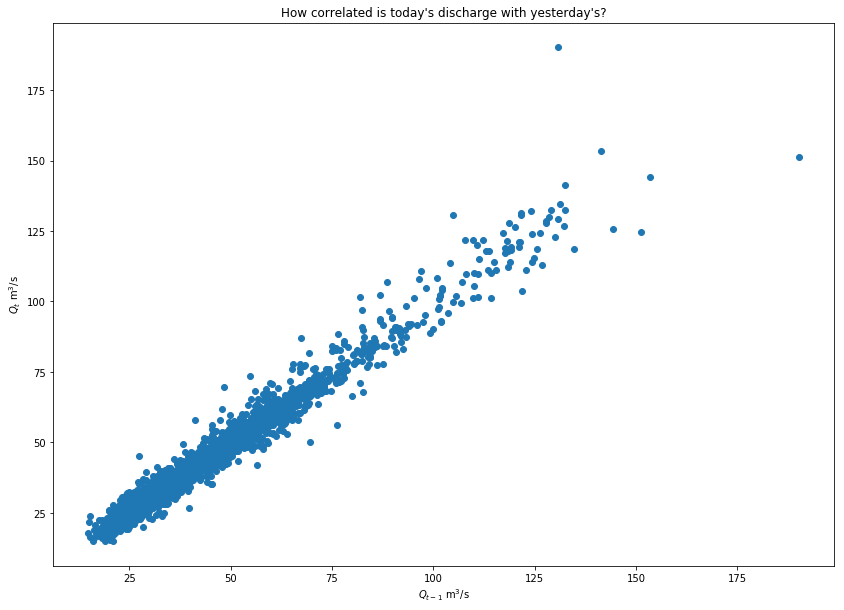

In [4]:
# Use the pandas .values operator to load the values of discharge (the 'Q' column)
# from the pandas dataframe into a numpy array
Q = df['Q'].values 

# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
Qt   = Q[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
Qtm1 = Q[0:-2]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Qtm1,Qt,'o')
plt.title('How correlated is today\'s discharge with yesterday\'s?')
plt.xlabel('$Q_{t-1}$ m$^3$/s')
plt.ylabel('$Q_t$ m$^3$/s')
plt.show()


# 5. Save the dataframe as a pandas "pickle" file

In [ ]:
df.to_pickle('HenrysForkDischarge_WY2001-2015.pkl')